**Perceptron**   by : Shaima Nabeel Albokhari  

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#load data
data_train = pd.read_csv("mnist_train.csv")
data_test = pd.read_csv("mnist_test.csv")

In [ ]:
#sxtract features (2-785 pixels) and labels (just 1 [0-9])
#scale pixel values to [0, 1] by x/255
X_train = data_train.iloc[:, 1:].values / 255.0
X_test = data_test.iloc[:, 1:].values / 255.0
y_train = data_train.iloc[:, 0].values
y_test = data_test.iloc[:, 0].values

#add bias term (column of 1s)
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

#convert labels to binary
def convert_to_binary_labels(y, target_digit):
    return (y == target_digit).astype(int)

In [ ]:
#perceptron class
class Perceptron:
    #initial function always call when use class
    def __init__(self, num_features, learning_rate):
        self.num_features = num_features
        self.learning_rate = learning_rate
        #create random values between (-0.05 to 0.05)
        self.weights = np.random.uniform(-0.05, 0.05, (num_features,))

    def forward(self, X):
        return np.dot(X, self.weights)  #return raw dot product

    def backward(self, x, y):
        net_input = self.forward(x)
        prediction = 1 if net_input > 0 else 0
        error = y - prediction
        #update weights
        self.weights += self.learning_rate * error * x.ravel()

    def iteration(self, X_train, y_train, X_test, y_test, epochs):
        train_accuracies = []
        test_accuracies = []

        #compute initial accuracy (epoch 0)
        train_accuracy = self.evaluate(X_train, y_train)
        test_accuracy = self.evaluate(X_test, y_test)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        for epoch in range(epochs):
            #shuffle data
            X_train, y_train = shuffle(X_train, y_train)
            #train on each example
            for i in range(y_train.shape[0]):
                self.backward(X_train[i], y_train[i])
            #calculate accuracies
            train_accuracy = self.evaluate(X_train, y_train)
            test_accuracy = self.evaluate(X_test, y_test)
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)
        return train_accuracies, test_accuracies

    def evaluate(self, X, y):
        predictions = self.forward(X).reshape(-1)
        #apply threshold for binary classification
        predictions = (predictions > 0).astype(int)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

In [ ]:
#final prediction
def predict(X, perceptrons):
    predictions = []
    for x in X:
        z_values = [np.dot(x, p.weights) for p in perceptrons]
        predicted_class = np.argmax(z_values)
        predictions.append(predicted_class)
    return np.array(predictions)


In [ ]:
def confusion_matrix(y_true, y_pred, labels):
    #initialize the confusion matrix with zeros
    num_classes = len(labels)
    cm = np.zeros((num_classes, num_classes), dtype=int)

    #map labels to indices
    label_to_index = {label: i for i, label in enumerate(labels)}

    #fill the confusion matrix
    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        cm[true_index][pred_index] += 1

    return cm

def plot_confusion_matrix(y_true, y_pred, lr, labels):
    #compute the confusion matrix using the custom function
    cm = confusion_matrix(y_true, y_pred, labels)

    #plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title(f'Confusion Matrix (Learning Rate = {lr})')

    #save the plot as an image file
    plt.savefig(f'confusion_matrix_lr_{lr}.png')
    plt.show()


Training with Learning Rate: 0.001
Training perceptron for digit 0
Training perceptron for digit 1
Training perceptron for digit 2
Training perceptron for digit 3
Training perceptron for digit 4
Training perceptron for digit 5
Training perceptron for digit 6
Training perceptron for digit 7
Training perceptron for digit 8
Training perceptron for digit 9
----------------------------------------


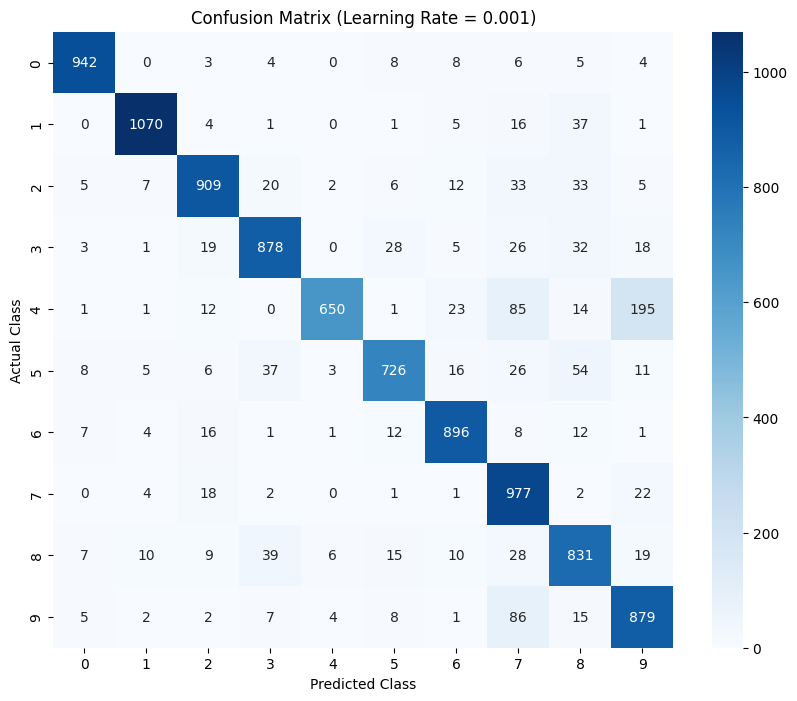

Training with Learning Rate: 0.01
Training perceptron for digit 0
Training perceptron for digit 1
Training perceptron for digit 2
Training perceptron for digit 3
Training perceptron for digit 4
Training perceptron for digit 5
Training perceptron for digit 6
Training perceptron for digit 7
Training perceptron for digit 8
Training perceptron for digit 9
----------------------------------------


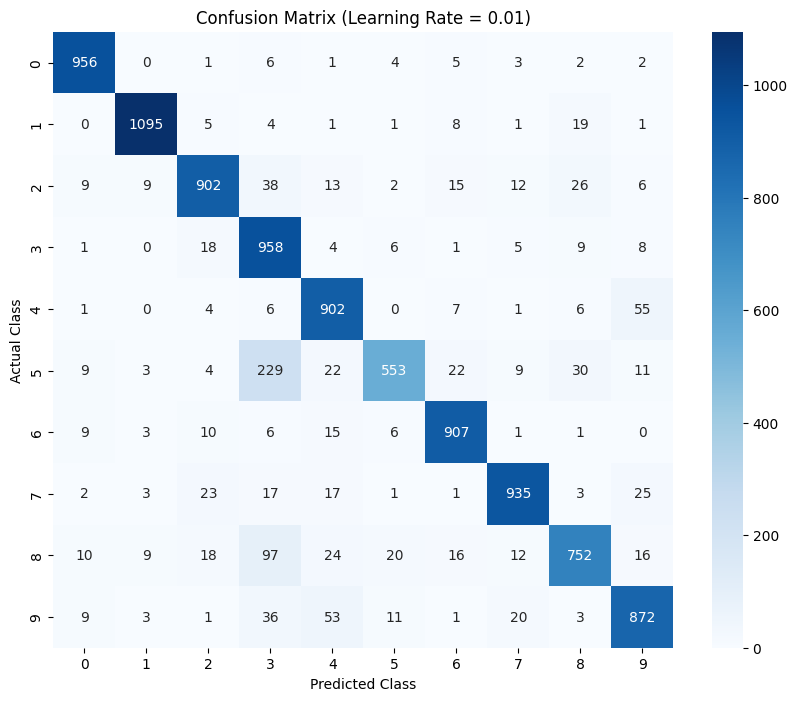

Training with Learning Rate: 0.1
Training perceptron for digit 0
Training perceptron for digit 1
Training perceptron for digit 2
Training perceptron for digit 3
Training perceptron for digit 4
Training perceptron for digit 5
Training perceptron for digit 6
Training perceptron for digit 7
Training perceptron for digit 8
Training perceptron for digit 9
----------------------------------------


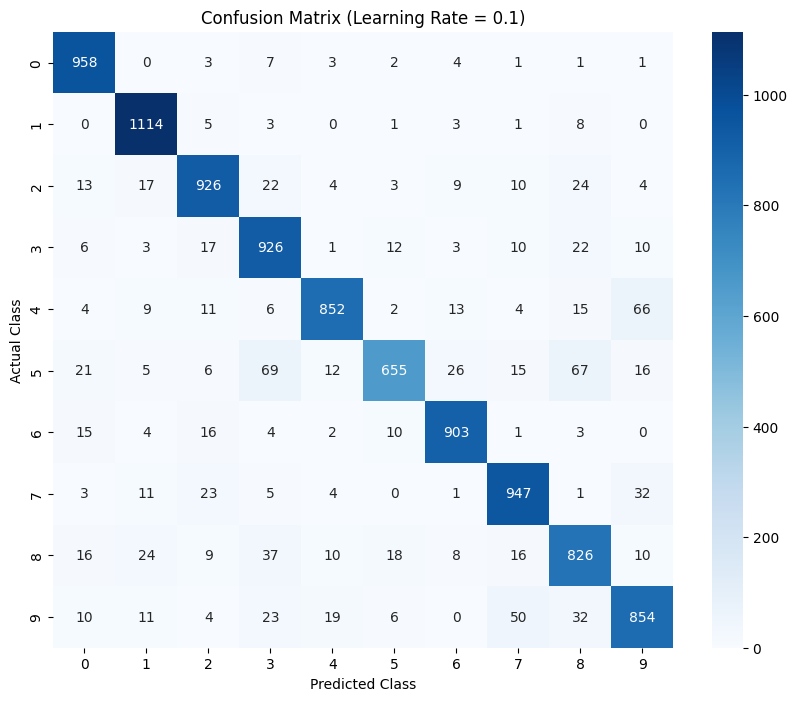

In [ ]:
#train each perceptron
epochs = 50
results = {}
learning_rates = [0.001, 0.01, 0.1]
#labels for digits 0-9
labels = list(range(10))

for lr in learning_rates:
    print(f"Training with Learning Rate: {lr}")
    #create 10 perceptrons (0-9)
    perceptrons = [Perceptron(num_features=785, learning_rate=lr) for _ in range(10)]
    #save accuracy for one perceptron
    train_accuracies_all = []
    test_accuracies_all = []

    for i in range(10):
        print(f"Training perceptron for digit {i}")
        #convert value of y (1 to 0001) to match with dot product(x*w)
        y_train_binary = convert_to_binary_labels(y_train, i)
        y_test_binary = convert_to_binary_labels(y_test, i)
        #training data
        train_acc, test_acc = perceptrons[i].iteration(X_train, y_train_binary, X_test, y_test_binary, epochs)
        train_accuracies_all.append(train_acc)
        test_accuracies_all.append(test_acc)
    #save accuracy for each lr
    results[lr] = {
        "train_accuracies": np.mean(train_accuracies_all, axis=0),
        "test_accuracies": np.mean(test_accuracies_all, axis=0)
    }
    print("-" * 40)

    #generate predictions for the test set
    y_test_pred = predict(X_test, perceptrons)
    #plot and save the confusion matrix
    plot_confusion_matrix(y_test, y_test_pred, lr, labels)



In [ ]:
#print accuracies for each learning rate
for lr, acc in results.items():
    print(f"Learning Rate: {lr}")
    #last epoch test accuracy
    print(f"Final Training Accuracy: {acc['train_accuracies'][-1] * 100:.2f}%")
    print(f"Final Test Accuracy: {acc['test_accuracies'][-1] * 100:.2f}%")
    print("-" * 40)

Learning Rate: 0.001
Final Training Accuracy: 97.18%
Final Test Accuracy: 97.07%
----------------------------------------
Learning Rate: 0.01
Final Training Accuracy: 97.00%
Final Test Accuracy: 96.92%
----------------------------------------
Learning Rate: 0.1
Final Training Accuracy: 97.08%
Final Test Accuracy: 96.88%
----------------------------------------


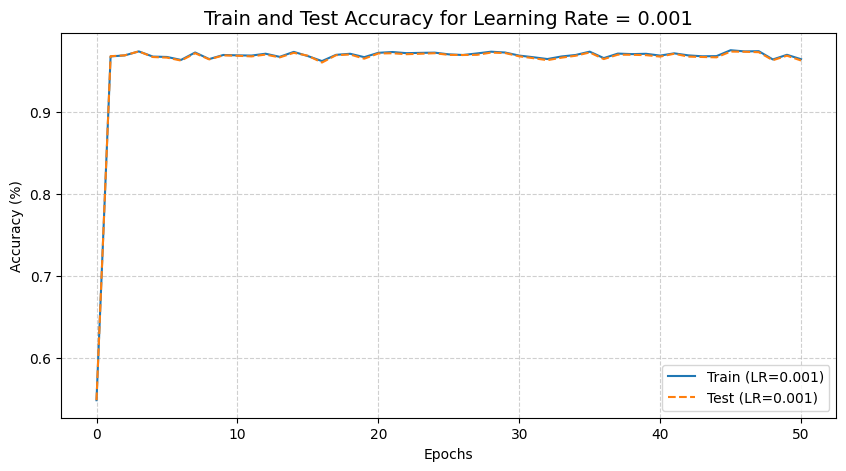

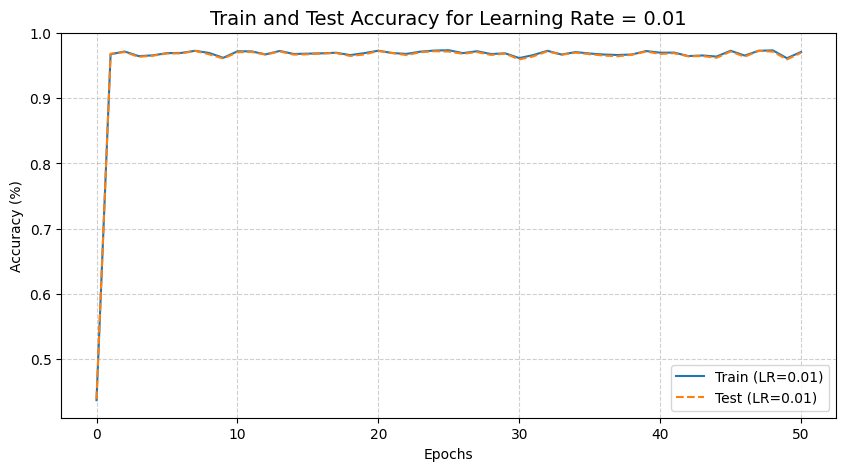

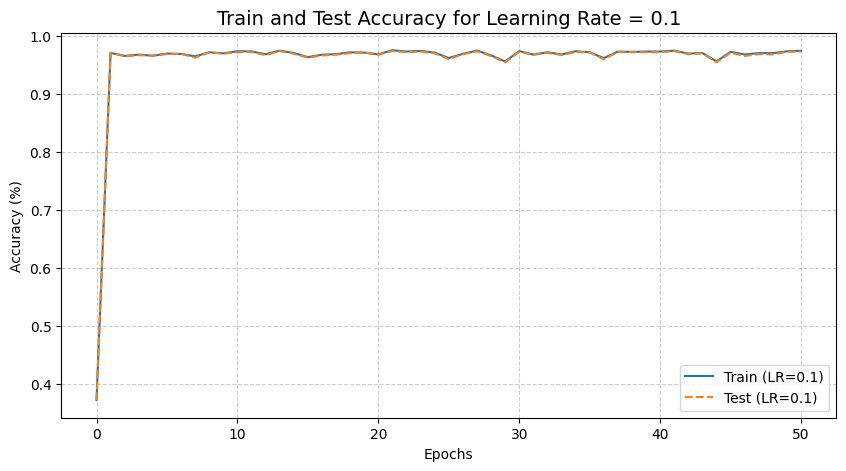

In [ ]:
#loop through each learning rate and create a separate figure
for lr, acc in results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs + 1), acc["train_accuracies"], label=f'Train (LR={lr})', linestyle='-')
    plt.plot(range(epochs + 1), acc["test_accuracies"], label=f'Test (LR={lr})', linestyle='--')

    #labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Train and Test Accuracy for Learning Rate = {lr}', fontsize=14)

    #legend and grid
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.6)

    #show the plot
    plt.show()

In [ ]:
#evaluate overall accuracy
y_train_pred = predict(X_train, perceptrons)
y_test_pred = predict(X_test, perceptrons)
train_accuracy = np.mean(y_train_pred == y_train)
test_accuracy = np.mean(y_test_pred == y_test)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Train Accuracy: 90.16%
Test Accuracy: 89.62%
